<a href="https://colab.research.google.com/github/Aniketxmishra/el/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")


In [2]:


titanic_data = sns.load_dataset('titanic')

print("Dataset Shape:", titanic_data.shape)
print("\nFirst 5 rows:")
titanic_data.head()


Dataset Shape: (891, 15)

First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:

print("=== DATASET OVERVIEW ===")
print(f"Dataset dimensions: {titanic_data.shape}")
print(f"Total passengers: {len(titanic_data)}")

print("\n=== DATA TYPES ===")
print(titanic_data.dtypes)

print("\n=== MISSING VALUES ===")
missing_data = titanic_data.isnull().sum()
missing_percentage = (missing_data / len(titanic_data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

print("\n=== NUMERICAL FEATURES SUMMARY ===")
numerical_features = titanic_data.select_dtypes(include=[np.number])
print(numerical_features.describe())

print("\n=== CATEGORICAL FEATURES SUMMARY ===")
categorical_features = titanic_data.select_dtypes(include=['object', 'category'])
for col in categorical_features.columns:
    print(f"\n{col} - Unique values: {titanic_data[col].nunique()}")
    print(titanic_data[col].value_counts().head())


=== DATASET OVERVIEW ===
Dataset dimensions: (891, 15)
Total passengers: 891

=== DATA TYPES ===
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

=== MISSING VALUES ===
             Missing Count  Percentage
deck                   688   77.216611
age                    177   19.865320
embarked                 2    0.224467
embark_town              2    0.224467

=== NUMERICAL FEATURES SUMMARY ===
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.52649

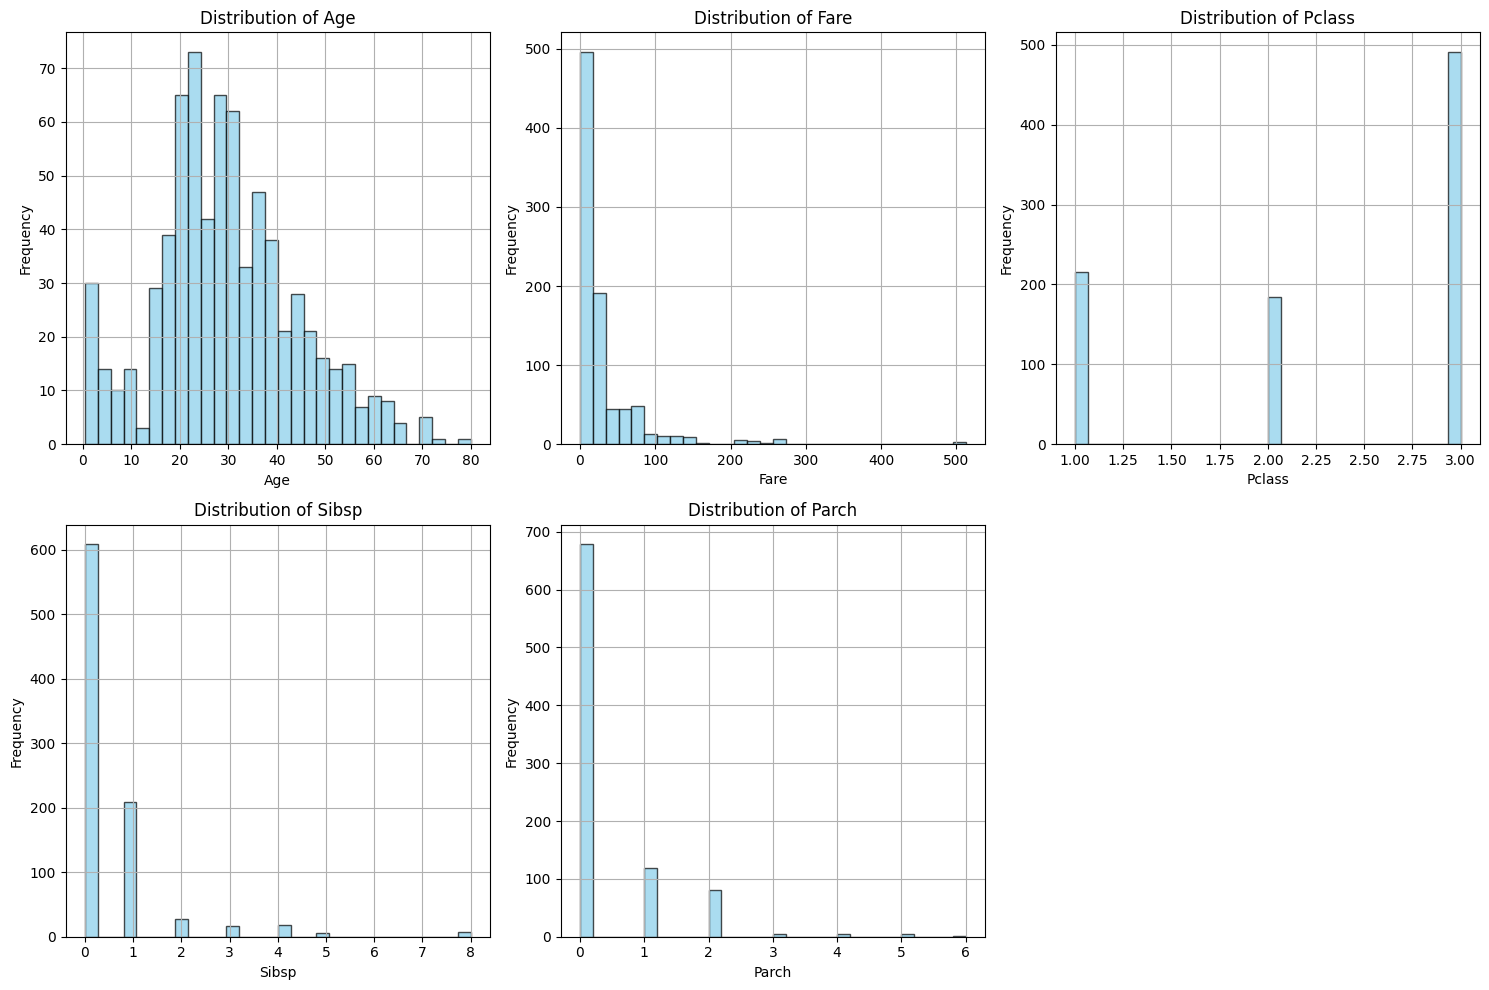

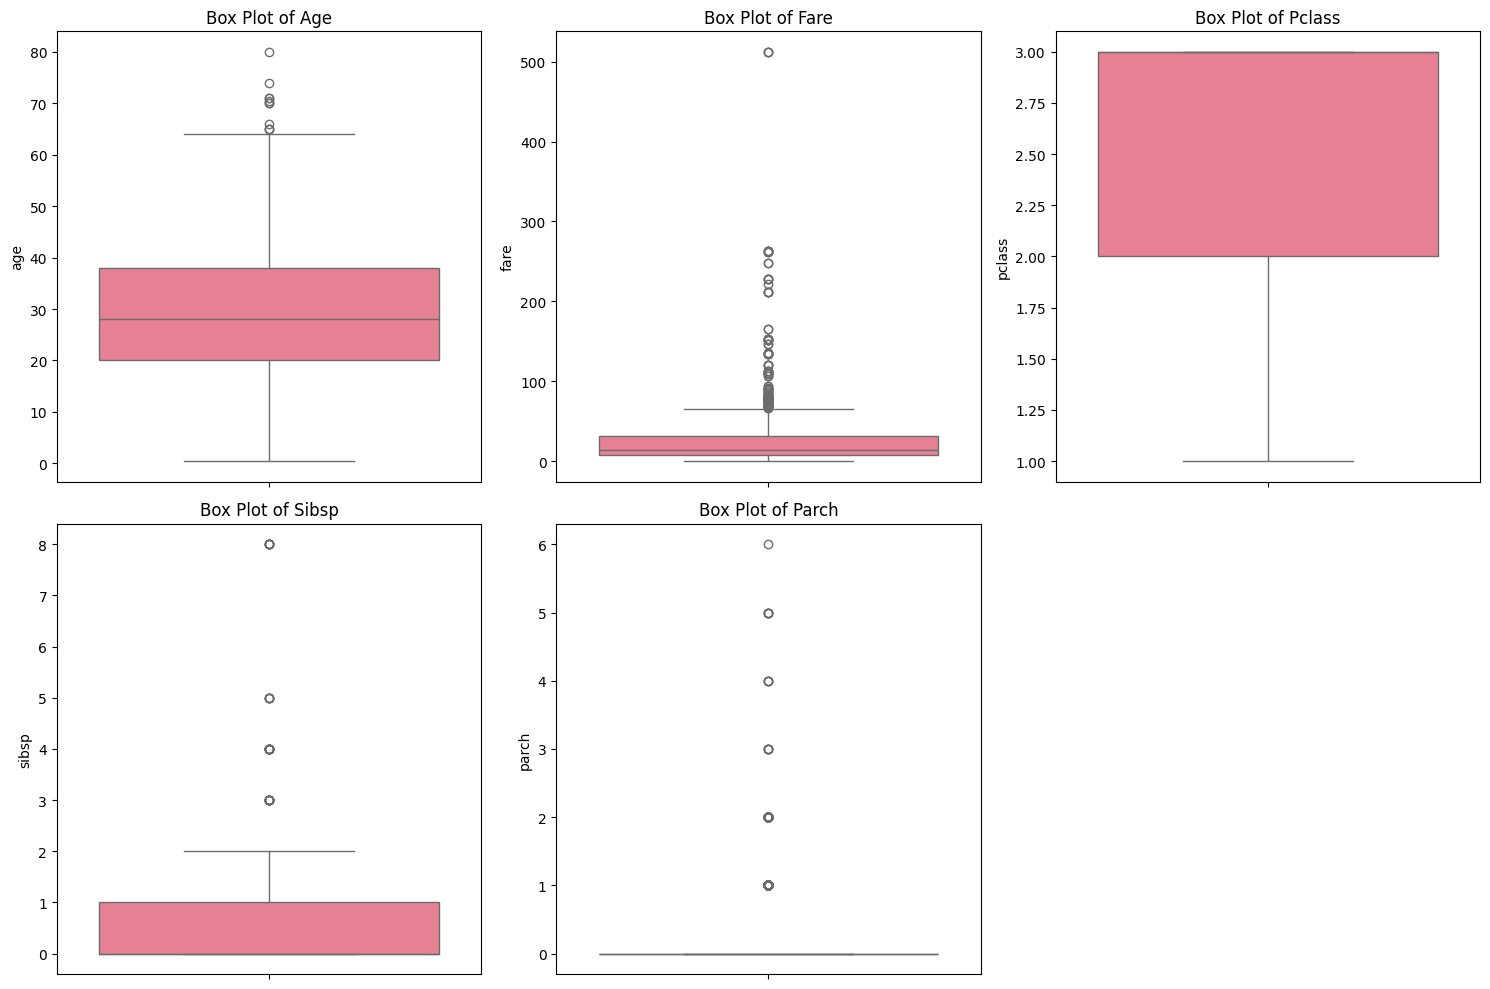

In [4]:
# Create histograms for numerical features
numerical_cols = ['age', 'fare', 'pclass', 'sibsp', 'parch']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        titanic_data[col].hist(bins=30, ax=axes[idx], alpha=0.7, color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col.title()}')
        axes[idx].set_xlabel(col.title())
        axes[idx].set_ylabel('Frequency')

# Remove empty subplot
if len(numerical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Create box plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.boxplot(data=titanic_data, y=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot of {col.title()}')

# Remove empty subplot
if len(numerical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


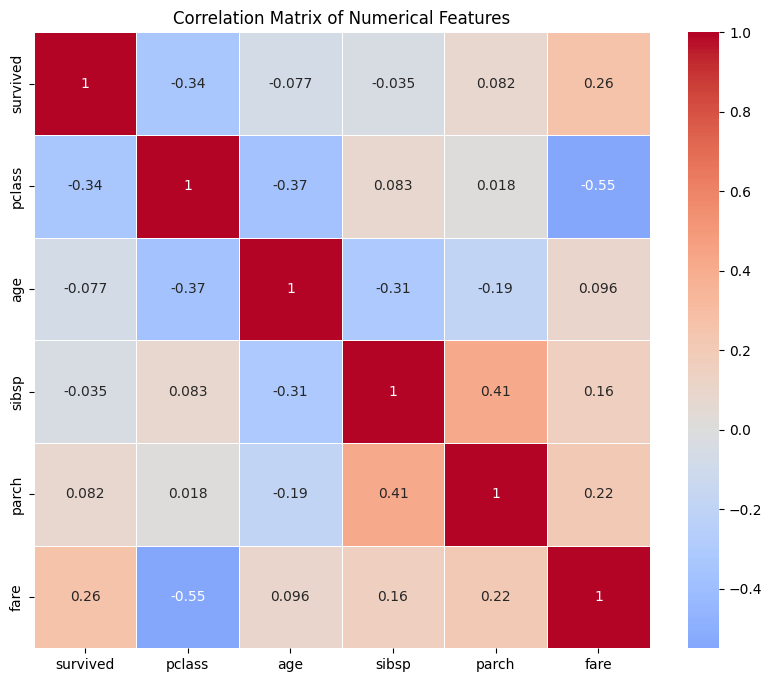

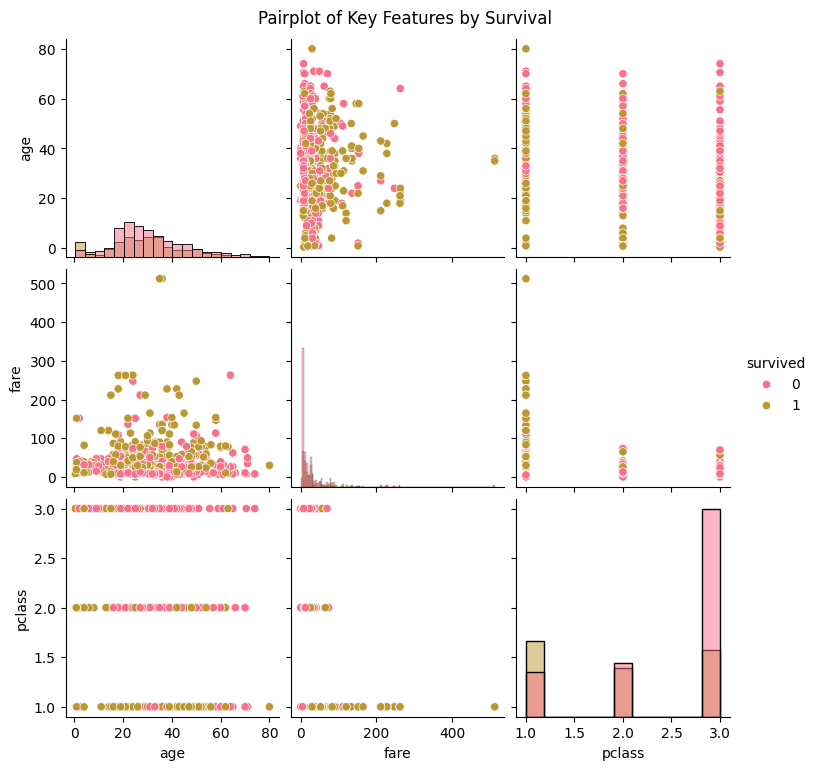

In [5]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pairplot for feature relationships
sns.pairplot(titanic_data[['survived', 'age', 'fare', 'pclass']],
             hue='survived', diag_kind='hist', height=2.5)
plt.suptitle('Pairplot of Key Features by Survival', y=1.02)
plt.show()


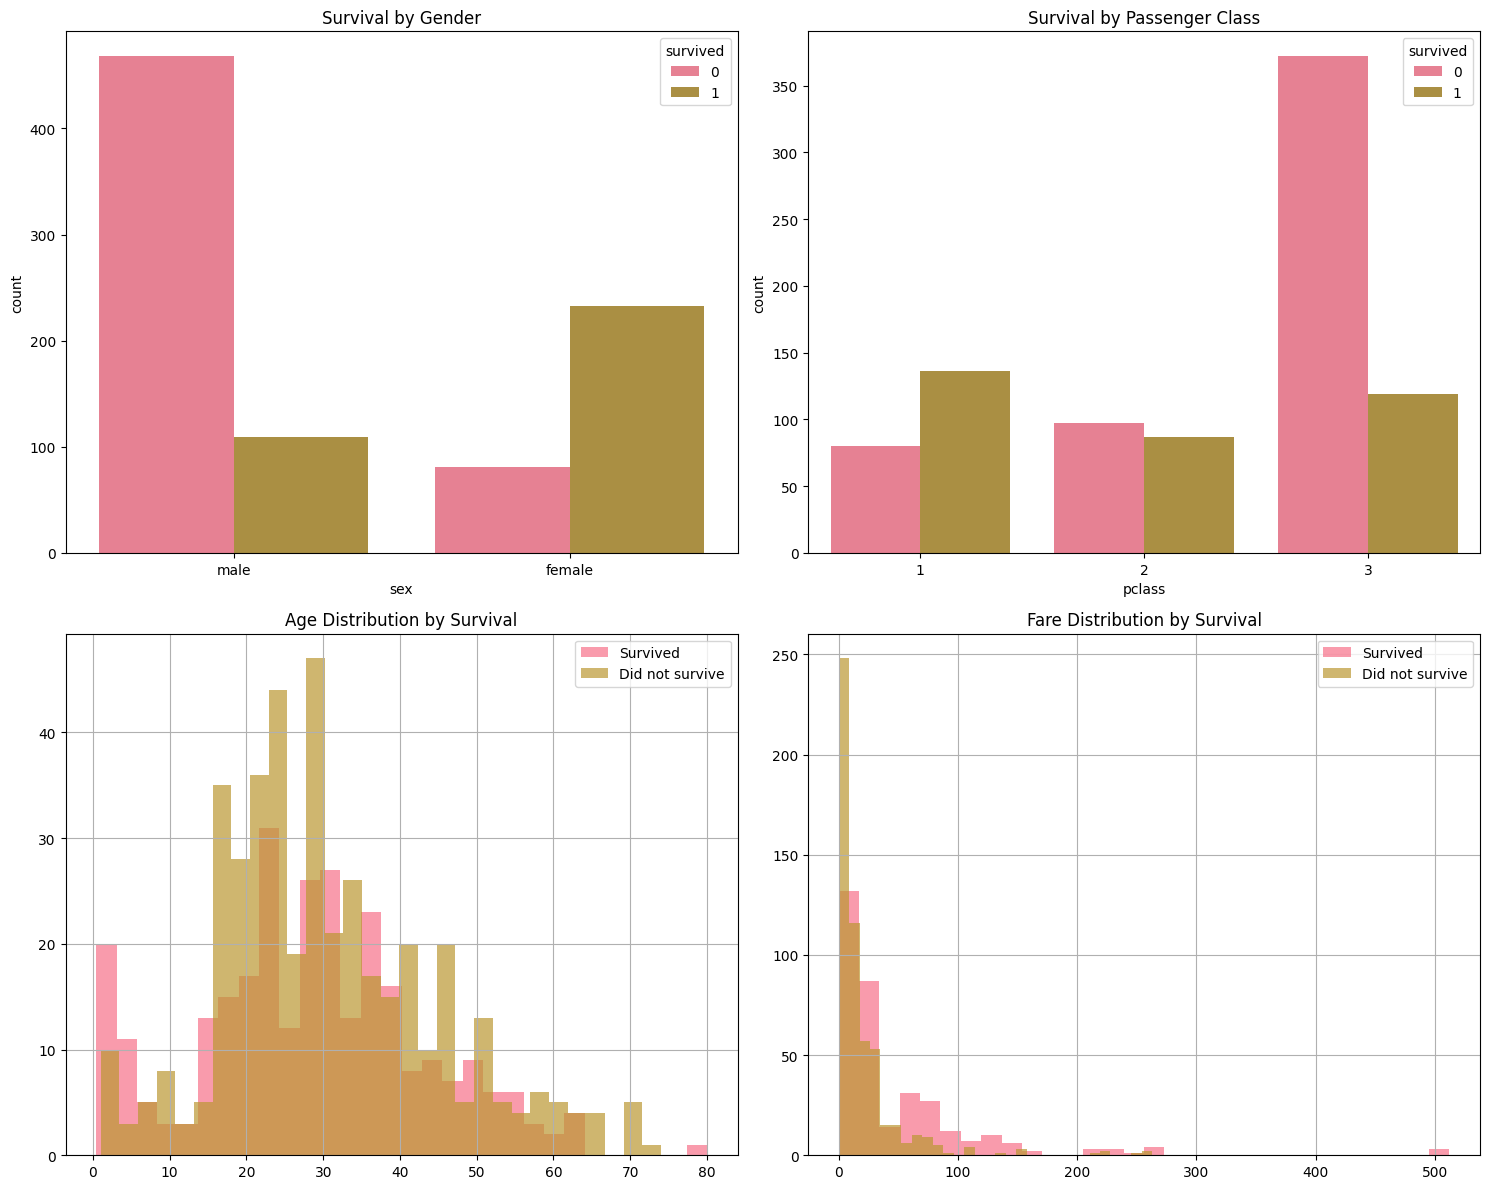

In [6]:
# Survival analysis by different categories
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Survival by Gender
sns.countplot(data=titanic_data, x='sex', hue='survived', ax=axes[0,0])
axes[0,0].set_title('Survival by Gender')

# Survival by Passenger Class
sns.countplot(data=titanic_data, x='pclass', hue='survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Passenger Class')

# Age distribution by survival
titanic_data[titanic_data['survived']==1]['age'].hist(alpha=0.7, bins=30,
                                                      label='Survived', ax=axes[1,0])
titanic_data[titanic_data['survived']==0]['age'].hist(alpha=0.7, bins=30,
                                                      label='Did not survive', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Survival')
axes[1,0].legend()

# Fare distribution by survival
titanic_data[titanic_data['survived']==1]['fare'].hist(alpha=0.7, bins=30,
                                                       label='Survived', ax=axes[1,1])
titanic_data[titanic_data['survived']==0]['fare'].hist(alpha=0.7, bins=30,
                                                       label='Did not survive', ax=axes[1,1])
axes[1,1].set_title('Fare Distribution by Survival')
axes[1,1].legend()

plt.tight_layout()
plt.show()


In [7]:
# Interactive survival analysis
fig = px.sunburst(titanic_data,
                  path=['sex', 'pclass', 'survived'],
                  title='Survival Breakdown by Gender and Class')
fig.show()

# Interactive scatter plot
fig = px.scatter(titanic_data, x='age', y='fare', color='survived',
                 size='pclass', hover_data=['sex', 'embarked'],
                 title='Age vs Fare colored by Survival')
fig.show()

# Interactive box plot
fig = px.box(titanic_data, x='pclass', y='age', color='survived',
             title='Age Distribution by Class and Survival')
fig.show()


In [8]:
# Survival rates by different categories
print("=== SURVIVAL ANALYSIS ===")

# Overall survival rate
overall_survival = titanic_data['survived'].mean()
print(f"Overall survival rate: {overall_survival:.2%}")

# Survival by gender
gender_survival = titanic_data.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
gender_survival['survival_rate'] = gender_survival['mean']
print(f"\nSurvival by Gender:")
print(gender_survival)

# Survival by class
class_survival = titanic_data.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])
print(f"\nSurvival by Class:")
print(class_survival)

# Age group analysis
titanic_data['age_group'] = pd.cut(titanic_data['age'],
                                   bins=[0, 12, 18, 35, 60, 100],
                                   labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_survival = titanic_data.groupby('age_group')['survived'].mean()
print(f"\nSurvival by Age Group:")
print(age_survival)


=== SURVIVAL ANALYSIS ===
Overall survival rate: 38.38%

Survival by Gender:
        count  sum      mean  survival_rate
sex                                        
female    314  233  0.742038       0.742038
male      577  109  0.188908       0.188908

Survival by Class:
        count  sum      mean
pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363

Survival by Age Group:
age_group
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Adult          0.400000
Senior         0.227273
Name: survived, dtype: float64


In [9]:
# Skewness analysis
print("=== SKEWNESS ANALYSIS ===")
for col in numerical_cols:
    if col in titanic_data.columns:
        skewness = titanic_data[col].skew()
        print(f"{col.title()} skewness: {skewness:.3f}")
        if abs(skewness) > 1:
            print(f"  -> {col.title()} is highly skewed")
        elif abs(skewness) > 0.5:
            print(f"  -> {col.title()} is moderately skewed")

# Outlier detection using IQR method
print("\n=== OUTLIER DETECTION ===")
for col in ['age', 'fare']:
    if col in titanic_data.columns:
        Q1 = titanic_data[col].quantile(0.25)
        Q3 = titanic_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = titanic_data[(titanic_data[col] < lower_bound) |
                               (titanic_data[col] > upper_bound)]
        print(f"{col.title()} outliers: {len(outliers)} ({len(outliers)/len(titanic_data)*100:.1f}%)")


=== SKEWNESS ANALYSIS ===
Age skewness: 0.389
Fare skewness: 4.787
  -> Fare is highly skewed
Pclass skewness: -0.631
  -> Pclass is moderately skewed
Sibsp skewness: 3.695
  -> Sibsp is highly skewed
Parch skewness: 2.749
  -> Parch is highly skewed

=== OUTLIER DETECTION ===
Age outliers: 11 (1.2%)
Fare outliers: 116 (13.0%)
